In [2]:
# Librerías necesarias
import pandas as pd
import scipy.stats as stats

# Cargar datos procesados
datos = pd.read_csv("../data/processed/datos_abril_evolve.csv")

# Asegurar que ciertas variables son categóricas
datos['SEXO'] = datos['SEXO'].astype('category')
datos['TIPO_ACCIDENTE'] = datos['TIPO_ACCIDENTE'].astype('category')
datos['DISTRITO'] = datos['DISTRITO'].astype('category')


# Test de Independencia Chi-cuadrado (SEXO vs TIPO DE ACCIDENTE)

Utilizamos este test ya que son dos variables categóricas y queremos comprobar si están relacionadas o no. 

In [4]:
# Tabla de contingencia
tabla_sexo_tipo = pd.crosstab(datos['SEXO'], datos['TIPO_ACCIDENTE'])

# Test de Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla_sexo_tipo)

print(f"Chi-cuadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")

# Interpretación
if p < 0.05:
    print("Existe una relación significativa entre el SEXO y el TIPO DE ACCIDENTE.")
else:
    print("No existe una relación significativa entre el SEXO y el TIPO DE ACCIDENTE.")


Chi-cuadrado: 2379.72
p-valor: 0.0000
Existe una relación significativa entre el SEXO y el TIPO DE ACCIDENTE.


# ¿Hubo un cambio significativo en el número de accidentes antes vs después de COVID?

No realizamos un t-test porque como se observaba en la gráfica de la distribucion de accidentes, no siguen una distribución normal. 
Por lo que utilizamos el test no paramétrico de Mann-Whitney U. para ver si la media de accidentes por año cambió.

In [7]:
def accidentes_unicos(datos):
    return datos.drop_duplicates(subset=['FECHA', 'RANGO_HORARIO', 'DISTRITO'])

datos_accidentes_unicos = accidentes_unicos(datos)


In [ ]:
datos_accidentes_unicos['PERIODO'] = datos_accidentes_unicos['AÑO'].apply(lambda x: 'PRE_COVID' if x < 2020 else 'POST_COVID')
accidentes_por_ano = datos_accidentes_unicos.groupby(['AÑO', 'PERIODO']).size().reset_index(name='NUM_ACCIDENTES')

pre_covid = accidentes_por_ano[accidentes_por_ano['PERIODO'] == 'PRE_COVID']['NUM_ACCIDENTES']
post_covid = accidentes_por_ano[accidentes_por_ano['PERIODO'] == 'POST_COVID']['NUM_ACCIDENTES']
from scipy.stats import mannwhitneyu

u_stat, p_valor = mannwhitneyu(pre_covid, post_covid, alternative='two-sided')

print(f"Mann-Whitney U statistic: {u_stat:.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print(" Hay diferencia significativa en el número de accidentes antes y después del COVID.")
else:
    print(" No hay diferencia significativa en el número de accidentes antes y después del COVID.")


Mann-Whitney U statistic: 5.00
p-valor: 0.0127
➔ Hay diferencia significativa en el número de accidentes antes y después del COVID.


/var/folders/d7/tm4f66h107bg3dgbtjknx2w00000gn/T/ipykernel_52764/1075771845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_accidentes_unicos['PERIODO'] = datos_accidentes_unicos['AÑO'].apply(lambda x: 'PRE_COVID' if x < 2020 else 'POST_COVID')


### Como era de esperar por lo que observamos en la gráfica, la diferencia entre accidentes antes de el covid y después, es significativa.

# Accidentes vs Mes (¿Hay correlación?)

Coeficiente de correlación de Spearman: 0.636
Valor-p: 0.026


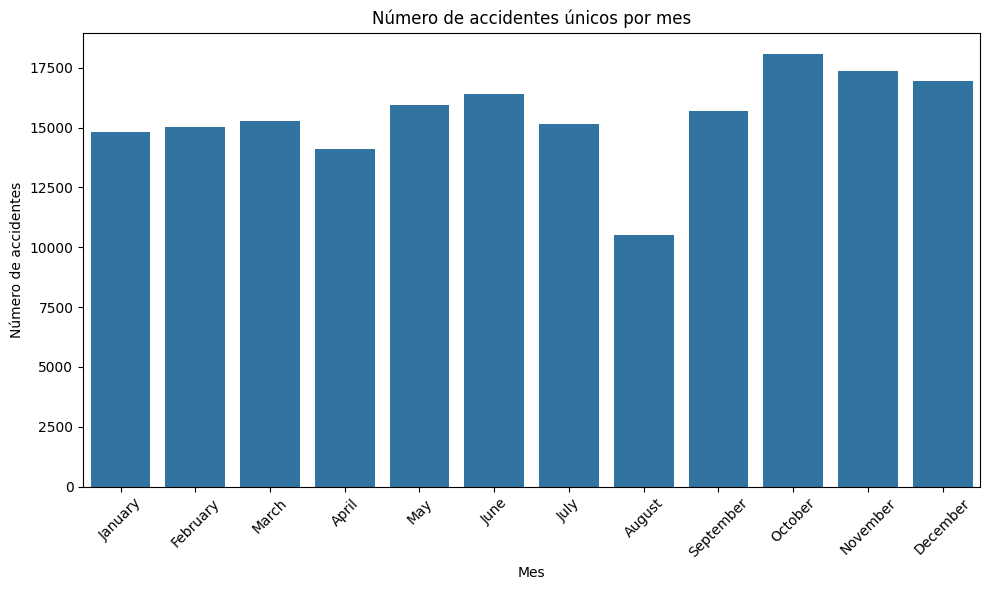

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Contamos accidentes únicos por mes
accidentes_mes = datos.drop_duplicates(subset=['FECHA', 'RANGO_HORARIO', 'DISTRITO']).groupby('MES').size()

# Ordenamos los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
accidentes_mes = accidentes_mes.reindex(meses_ordenados)

# Codificar meses como números para Spearman
mes_numerico = range(1, 13)

# Test de correlación Spearman
correlacion, pvalor = stats.spearmanr(mes_numerico, accidentes_mes.values)

print(f"Coeficiente de correlación de Spearman: {correlacion:.3f}")
print(f"Valor-p: {pvalor:.3f}")

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=accidentes_mes.index, y=accidentes_mes.values)
plt.xticks(rotation=45)
plt.title('Número de accidentes únicos por mes')
plt.ylabel('Número de accidentes')
plt.xlabel('Mes')
plt.tight_layout()
plt.show()


Existe una correlación positiva moderada y significativa entre el mes del año y el número de accidentes, lo que indica que los accidentes tienden a incrementarse conforme avanza el año.

# Distrito vs Gravedad del Accidente (Lesividad)

In [13]:
# Crear tabla de contingencia
tabla_distrito_lesividad = pd.crosstab(
    datos['DISTRITO'],
    datos['LESIVIDAD']
)

# Test Chi-cuadrado
chi2, pvalor, dof, expected = stats.chi2_contingency(tabla_distrito_lesividad)

print(f"Estadístico Chi-cuadrado: {chi2:.3f}")
print(f"Valor-p: {pvalor:.3f}")

# Mostrar tabla de contingencia normalizada (porcentajes)
tabla_percent = tabla_distrito_lesividad.div(tabla_distrito_lesividad.sum(axis=1), axis=0) * 100
tabla_percent.round(2)


Estadístico Chi-cuadrado: 1970.825
Valor-p: 0.000


LESIVIDAD,HG,HL,IL,MT,NO ASIGNADO
DISTRITO,,,,,
ARGANZUELA,2.52,33.64,47.15,0.08,16.61
BARAJAS,2.29,31.41,38.44,0.08,27.78
CARABANCHEL,2.31,35.10,43.26,0.06,19.27
CENTRO,2.65,35.58,44.18,0.08,17.51
CHAMARTIN,2.50,32.61,46.10,0.08,18.69
CHAMBERI,2.76,35.39,45.63,0.10,16.12
CIUDAD LINEAL,2.43,33.54,43.39,0.08,20.57
FUENCARRAL-EL PARDO,2.60,34.91,42.24,0.15,20.11
HORTALEZA,2.55,34.89,42.12,0.09,20.36


El análisis de Chi-cuadrado nos muestra una asociación estadísticamente significativa entre el distrito y la gravedad de los accidentes. Lo que se concluye es que la gravedad varía en función del distrito.